In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
# 3
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255)

train_data_gen = train_image_generator.flow_from_directory(directory = train_dir,
                                                           batch_size = batch_size,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = "binary")
val_data_gen = validation_image_generator.flow_from_directory(directory = validation_dir,
                                                              batch_size = batch_size,
                                                              target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode = "binary")
test_data_gen = test_image_generator.flow_from_directory(directory = PATH,
                                                         batch_size = batch_size,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         shuffle = False,
                                                         classes=['test'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


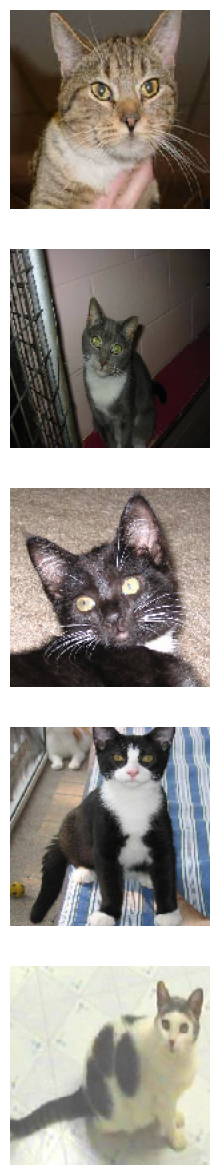

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0 / 255,
                                                                        rotation_range=40,
                                                                        zoom_range=0.25,
                                                                        width_shift_range=0.25,
                                                                        height_shift_range=0.25,
                                                                        horizontal_flip=True,
                                                                        fill_mode='nearest')



Found 2000 images belonging to 2 classes.


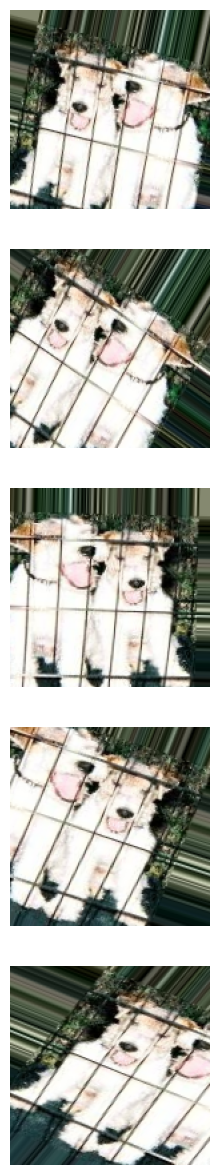

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [16]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │       4,735,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,791,490 (18.28 MB)

 Trainable params: 4,791,490 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=10,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=6
)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.5154 - loss: 1.1953 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - accuracy: 0.5122 - loss: 0.6942 - val_accuracy: 0.4784 - val_loss: 0.6947
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.5048 - loss: 0.6942 - val_accuracy: 0.5729 - val_loss: 0.6893
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5081 - loss: 0.6917 - val_accuracy: 0.5474 - val_loss: 0.6807
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.5022 - loss: 0.6895 - val_accuracy: 0.5143 - val_loss: 0.6921
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.4928 - loss: 0.6948 - val_accuracy: 0.5776 - val_loss: 0.6761
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.5583 - loss: 0.6815 - val_accuracy: 0.5964 - val_loss: 0.6677
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5793 - loss: 0.6758 - val_accuracy: 0.5129 - val_loss

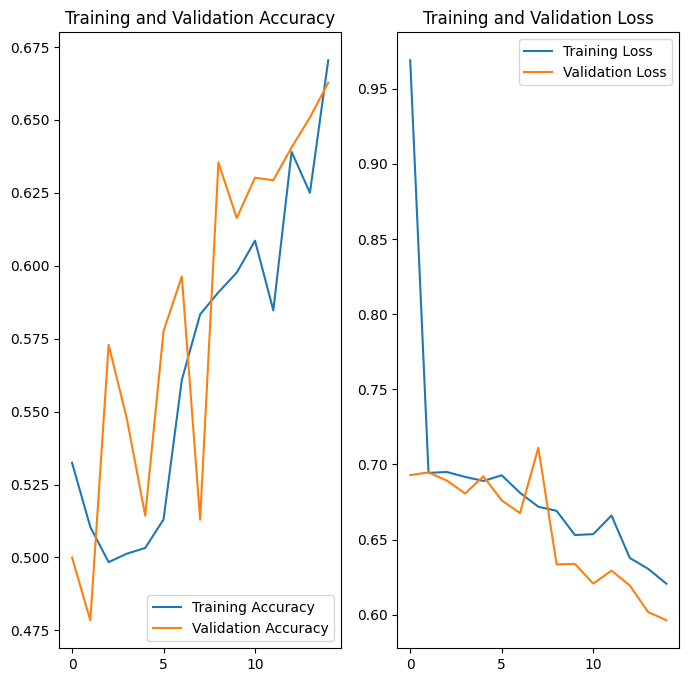

In [19]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
print(probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
[1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1
 1 0 1 0 0 1 0 1 0 1 1 0 0]


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")